In [124]:
from prophet import Prophet
import pandas as pd
from glob import glob

In [ ]:
file_name=glob('data/S-Dot_WALK_2023년(2023.01.01~2024.01.01)/*.csv')

In [4]:
for year in [2023,2024] : 
    df_year = pd.DataFrame()
    for file_name in file_names: 
        try: 
            temp = pd.read_csv(file_name, sep=',', encoding='cp949')
            df_year = pd.concat([df_year, temp])
        except pd.errors.EmptyDataError: 
            print("빈 파일:", file_name)
        except pd.errors.ParserError:
            print("해석 오류:", file_name)
        except Exception as e: 
            print("파일 처리 중 오류 발생:", file_name)
            print("에러 메시지:", str(e))
    df_year.to_csv(f"data/df_{year}.csv", index=False) 

In [5]:
df_2023 = pd.read_csv('data/df_2023.csv', sep=',', encoding='utf-8')
df_2023_yeoksam1 = df_2023[df_2023['행정동'] == 'Yeoksam1-dong']
df_2023_yeoksam1

C:\Users\20061\AppData\Local\Temp\ipykernel_26272\1717598740.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('data/df_2023.csv', sep=',', encoding='utf-8')


,모델번호,시리얼,측정시간,지역,자치구,행정동,방문자수,등록일
86,SDOT001,4010.0,2023-01-01_23:55:00,main_street,Gangnam-gu,Yeoksam1-dong,30,2023-01-02 00:08:07
217,SDOT001,4010.0,2023-01-02_00:15:00,main_street,Gangnam-gu,Yeoksam1-dong,27,2023-01-02 00:28:05
301,SDOT001,4010.0,2023-01-02_00:25:00,main_street,Gangnam-gu,Yeoksam1-dong,21,2023-01-02 00:38:04
385,SDOT001,4010.0,2023-01-02_00:35:00,main_street,Gangnam-gu,Yeoksam1-dong,29,2023-01-02 00:48:04
483,SDOT001,4010.0,2023-01-02_00:45:00,main_street,Gangnam-gu,Yeoksam1-dong,14,2023-01-02 00:58:05
...,...,...,...,...,...,...,...,...
3050334,NaN,NaN,2024-01-07_23:05:00,main_street,Gangnam-gu,Yeoksam1-dong,94,2024-01-07 23:18:02
3050385,NaN,NaN,2024-01-07_23:15:00,main_street,Gangnam-gu,Yeoksam1-dong,76,2024-01-07 23:28:03
3050441,NaN,NaN,2024-01-07_23:25:00,main_street,Gangnam-gu,Yeoksam1-dong,66,2024-01-07 23:38:02
3050488,NaN,NaN,2024-01-07_23:35:00,main_street,Gangnam-gu,Yeoksam1-dong,57,2024-01-07 23:48:03


In [139]:
df_2023_yeoksam1.columns

Index(['모델번호', '시리얼', '측정시간', '지역', '자치구', '행정동', '방문자수', '등록일'], dtype='object')

In [140]:
df_2023_yeoksam1.drop(['모델번호', '시리얼', '지역','자치구', '행정동', '등록일'], axis=1, inplace = True)

C:\Users\20061\AppData\Local\Temp\ipykernel_19240\1811316543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_yeoksam1.drop(['모델번호', '시리얼', '지역','자치구', '행정동', '등록일'], axis=1, inplace = True)


In [141]:
df_2023_yeoksam1.reset_index(drop=True, inplace=True)
df_2023_yeoksam1

,측정시간,방문자수
0,2023-01-01_23:55:00,30
1,2023-01-02_00:15:00,27
2,2023-01-02_00:25:00,21
3,2023-01-02_00:35:00,29
4,2023-01-02_00:45:00,14
...,...,...
43054,2024-01-07_23:05:00,94
43055,2024-01-07_23:15:00,76
43056,2024-01-07_23:25:00,66
43057,2024-01-07_23:35:00,57


In [148]:
# 라이브러리 import
from prophet import Prophet
from datetime import datetime, timedelta
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
import pandas as pd

In [149]:
df = df_2023_yeoksam1
df.head()

,측정시간,방문자수
0,2023-01-01_23:55:00,30
1,2023-01-02_00:15:00,27
2,2023-01-02_00:25:00,21
3,2023-01-02_00:35:00,29
4,2023-01-02_00:45:00,14


In [159]:
data = df.rename(columns={'측정시간':'ds','방문자수':'y'})

                        ds   y
0      2023-01-01_23:55:00  30
1      2023-01-02_00:15:00  27
2      2023-01-02_00:25:00  21
3      2023-01-02_00:35:00  29
4      2023-01-02_00:45:00  14
...                    ...  ..
43054  2024-01-07_23:05:00  94
43055  2024-01-07_23:15:00  76
43056  2024-01-07_23:25:00  66
43057  2024-01-07_23:35:00  57
43058  2024-01-07_23:45:00  50

[43059 rows x 2 columns]


In [163]:
for i in range(len(data)):
    convert_date = data.loc[i,'ds'].replace('_', ' ')
    data.loc[i,'ds'] = convert_date

data

,ds,y
0,2023-01-01 23:55:00,30
1,2023-01-02 00:15:00,27
2,2023-01-02 00:25:00,21
3,2023-01-02 00:35:00,29
4,2023-01-02 00:45:00,14
...,...,...
43054,2024-01-07 23:05:00,94
43055,2024-01-07 23:15:00,76
43056,2024-01-07 23:25:00,66
43057,2024-01-07 23:35:00,57


In [164]:
m = Prophet()
m.fit(data)

17:50:06 - cmdstanpy - INFO - Chain [1] start processing
17:50:24 - cmdstanpy - INFO - Chain [1] done processing


In [165]:
# 예측 기간 추가 
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
42469,2024-02-02 23:45:00
42470,2024-02-03 23:45:00
42471,2024-02-04 23:45:00
42472,2024-02-05 23:45:00
42473,2024-02-06 23:45:00


In [166]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
42469,2024-02-02 23:45:00,126.465938,59.585361,198.442323
42470,2024-02-03 23:45:00,115.642355,49.966192,190.900064
42471,2024-02-04 23:45:00,79.737424,8.838822,153.479792
42472,2024-02-05 23:45:00,92.025611,19.502098,160.908986
42473,2024-02-06 23:45:00,90.923029,19.604474,163.948670


c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

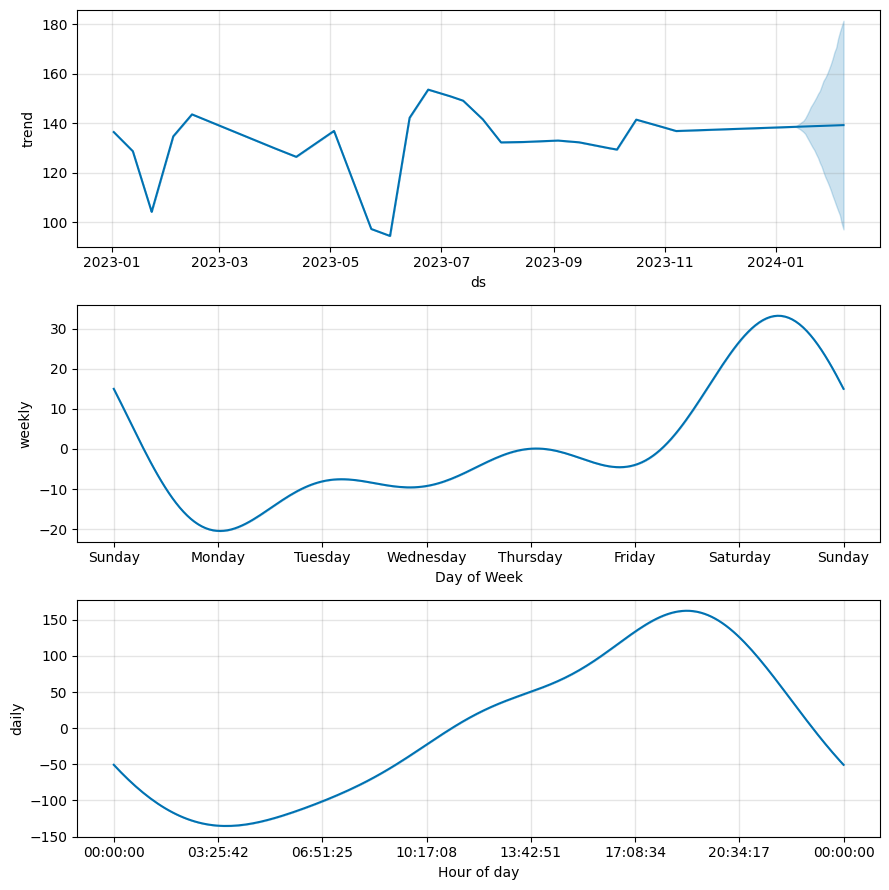

In [168]:
fig2 = m.plot_components(forecast)

c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\20061\OneDrive\바탕 화면\test\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


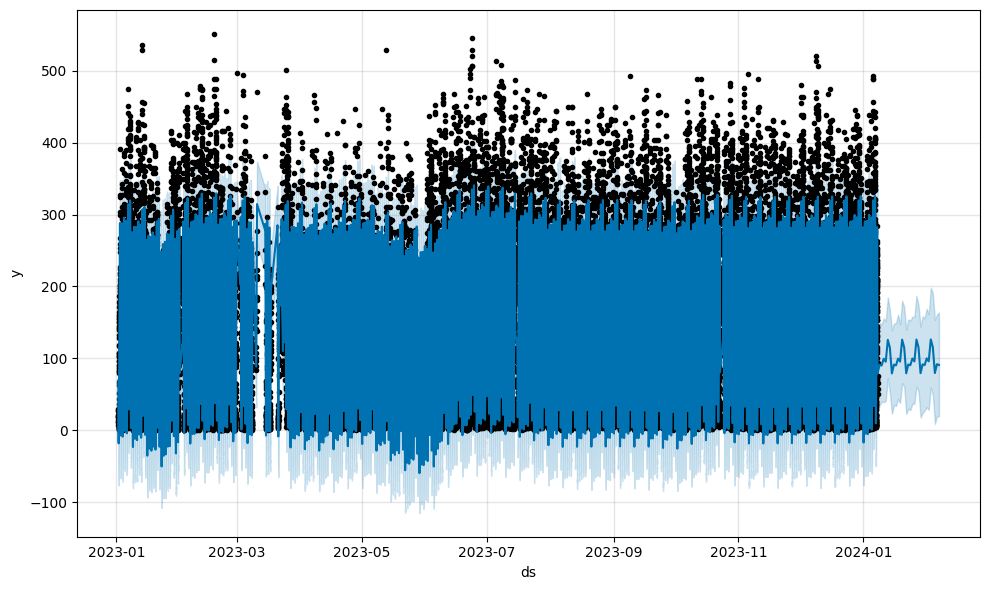

In [169]:
fig1 = m.plot(forecast)